<a href="https://colab.research.google.com/github/sequedakarina/reconocimiento-de-caracteres-y-reproduccion-de-voz/blob/master/RECONOCIMIENTO_DE_CARACTERES_Y__REPRODUCCION_DE_VOZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
pip install gTTs

  Stored in directory: /root/.cache/pip/wheels/ac/d3/52/db6c154b20dfaab7e0b514eb5eef92cecd057e40e16fdda58b
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gTTs gtts-token


In [0]:
#Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import convolve2d
from skimage import filters
from skimage import io
from gtts import gTTS




In [0]:
def voz(frase, lang, nombre):
    file = gTTS(text=frase,lang=lang)
    file.save(nombre)
  

In [0]:
def concatena(prueba):
  caracteres=[]
  for i in range(len(prueba)):
    
            if prueba[i]==1:  
               caracteres.append("a")
                     
            elif prueba[i]==2:  
              caracteres.append("b")
                     
            elif prueba[i]==3:
              caracteres.append("c")
                     
            elif prueba[i]==4: 
              caracteres.append("d")
              
            elif prueba[i]==5: 
              caracteres.append("e")
                     
            elif prueba[i]==6:  
              caracteres.append("f")
                     
            elif prueba[i]==7: 
              caracteres.append("g")
                     
            elif prueba[i]==8: 
              caracteres.append("h")
                     
            elif prueba[i]==9:  
              caracteres.append("i")
                     
            elif prueba[i]==10:
              caracteres.append("j")
                     
            elif prueba[i]==11:
              caracteres.append("k")
                     
            elif prueba[i]==12:
              caracteres.append("l")
                     
            elif prueba[i]==13:
              caracteres.append("m")
                     
            elif prueba[i]==14:
              caracteres.append("n")
                     
            elif prueba[i]==15: 
              caracteres.append("o")
                     
            elif prueba[i]==16:
              caracteres.append("p")
                     
            elif prueba[i]==17: 
              caracteres.append("q")
                     
            elif prueba[i]==18: 
              caracteres.append("r")
                     
            elif prueba[i]==19: 
              caracteres.append("s")
                     
            elif prueba[i]==20: 
              caracteres.append("t")
                     
            elif prueba[i]==21: 
              caracteres.append("u")
                    
            elif prueba[i]==22: 
              caracteres.append("v")
                     
            elif prueba[i]==23: 
              caracteres.append("w")
                     
            elif prueba[i]==24:
              caracteres.append("x")
                     
            elif prueba[i]==25: 
              caracteres.append("y")
                     
            elif prueba[i]==26: 
              caracteres.append("z")
              
  frase= "".join([i for i in caracteres])
  return frase

In [0]:
def clasificacion(xtest):
          
          import numpy as np
          import matplotlib.pyplot as plt
          from sklearn.preprocessing import StandardScaler
          from sklearn.naive_bayes import GaussianNB
          from sklearn.metrics import confusion_matrix
          from sklearn.svm import SVC
          from sklearn.tree import DecisionTreeClassifier 
          from sklearn.ensemble import RandomForestClassifier
          from sklearn.model_selection import KFold, cross_val_score
          from sklearn.decomposition import PCA
          import cv2
          from scipy.signal import convolve2d
          from sklearn.pipeline import Pipeline
          from skimage import filters
         
          import pandas as pd
          X_test = pd.read_csv("drive/My Drive/Colab Notebooks/ai-20182-master/data/emnist-letters-test-images.csv", header=None).values.astype(float)
          y_test= pd.read_csv("drive/My Drive/Colab Notebooks/ai-20182-master/data/emnist-letters-test-labels.csv", header=None).values
          X_train= pd.read_csv("drive/My Drive/Colab Notebooks/ai-20182-master/data/emnist-letters-train-images2.csv", header=None).values.astype(float)
          y_train= pd.read_csv("drive/My Drive/Colab Notebooks/ai-20182-master/data/emnist-letters-train-labels2.csv", header=None).values
         

          #Para rotar la imagen 
          for j in range(62400):
            Y=X_train[j].reshape(28,28).T
            X_train[j]=Y.reshape(784)

          for j in range(20800):
              Y=X_test[j].reshape(28,28).T
              X_test[j]=Y.reshape(784)


          #Clasificadores

          est1=RandomForestClassifier(n_estimators=80,  max_depth = 20)

          #Binarización
          for j in range(62400):
              img=X_train[j].reshape(28,28)
              _, img1 = cv2.threshold(img,110, 255, cv2.THRESH_BINARY)
              X_train[j]=img1.reshape(784)

          for j in range(20800):
              img=X_test[j].reshape(28,28)
              _, img1 = cv2.threshold(img,110, 255, cv2.THRESH_BINARY)
              X_test[j]=img1.reshape(784)


          #PCA con n componentes
          pca=PCA(n_components=40)
          X_train = pca.fit_transform(X_train)
          #image=image.reshape(1,-1)
          xtest = pca.transform (xtest)          
         
          #RandomForest
          est1.fit(X_train,y_train)
          pred= est1.predict(xtest)
          return pred



# ***Imagenes con ruido***

# ***PARTE1: PRE-PROCESAMIENTO***

In [0]:
for i in range(2):
    #ruta="drive/My Drive/Colab Notebooks/Imagenes/image%d.jpg" % (i+1)
    img= cv2.imread("drive/My Drive/Colab Notebooks/Imagenes2/foto2.jpeg")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
  

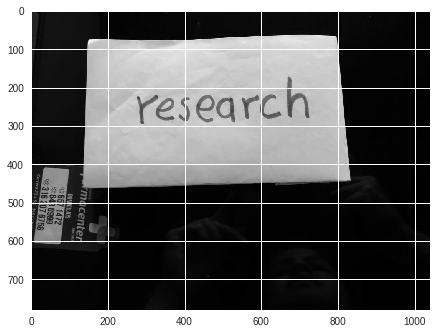

In [0]:
plt.imshow(gray,cmap = plt.cm.gray)

In [0]:
#Binarización
_, img1 = cv2.threshold(gray,130, 255, cv2.THRESH_BINARY)



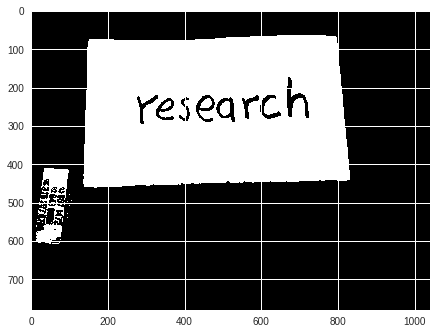

In [0]:
plt.imshow(img1,cmap = plt.cm.gray)

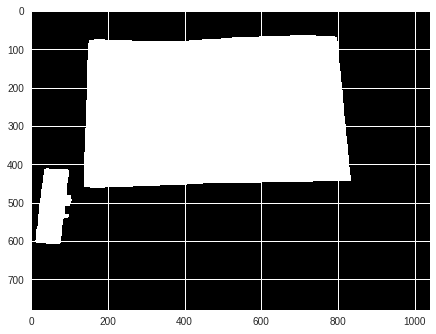

In [0]:
# CIERRE--COVOLUCIÓN
#Es útil para cerrar pequeños orificios dentro de los objetos en primer plano o pequeños puntos negros en el objeto.


kernel1  =  np . ones ((20,20), np . uint8 )
cierre  =  cv2.morphologyEx(img1, cv2.MORPH_CLOSE, kernel1)
plt.imshow(cierre,cmap = plt.cm.gray)

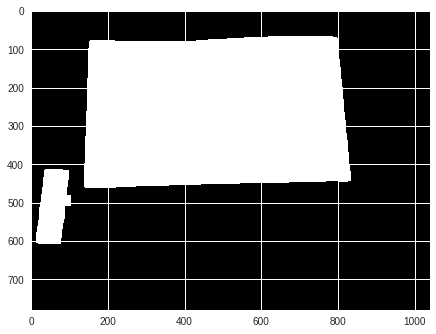

In [0]:
#Apertura Es útil para eliminar el ruido de puntos blancos
kernel1  =  np . ones ((20,20), np . uint8 )
apertura = cv2.morphologyEx(cierre, cv2.MORPH_OPEN, kernel1)
plt.imshow(apertura,cmap = plt.cm.gray)

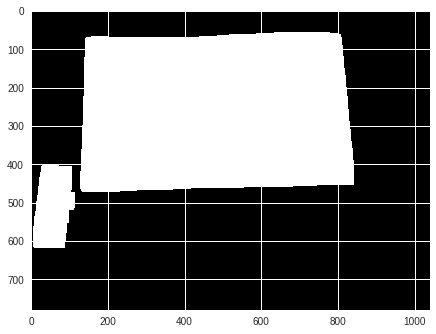

In [0]:
#Dilatación para unir partes del objeto que quedan incompletas
kernel1  =  np . ones ((20,20), np . uint8 )
dilatacion = cv2.dilate(apertura,kernel1,iterations = 1)
plt.imshow(dilatacion,cmap = plt.cm.gray)

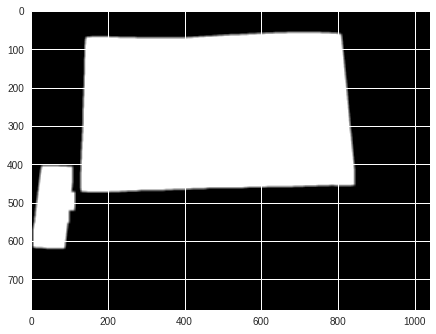

In [0]:
blur = cv2.blur (dilatacion, (8,8))
plt.imshow(blur,cmap = plt.cm.gray)

In [0]:
#Encontrar contornos es como encontrar un objeto blanco sobre un fondo negro.
#Así que recuerde, el objeto que se debe encontrar debe ser blanco y el fondo debe ser negro.

#3 argumentos en la función cv2.findContours () , el primero es la imagen de origen,
#el segundo es el modo de recuperación de contorno, el tercero es el método de aproximación de contorno.


#Da salida a los contornos y la jerarquía. contornos es una lista de Python de todos los contornos en la imagen. 
#Cada contorno individual es una matriz de numpy de coordenadas (x, y) de puntos de límite del objeto.
im2, contornos, jerarquía = cv2.findContours (blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contornos=np.r_[contornos]

In [0]:
limites= np.zeros((len(contornos),4))
areas=np.zeros((len(contornos),1))
for i in range(len(contornos)):
  #Señalar los limites del rextangulo, xInit, yInit, xEnd, fEnd
  limites[i,:]= cv2.boundingRect(contornos[i])
  puntox1= limites[i,0]
  puntox2=limites[i,2]
  puntoy1= limites[i,1]
  puntoy2= limites[i,3]
  base= (puntox2-puntox1)
  altura= (puntoy2-puntoy1)
  areas[i]=base*altura
  
  

In [0]:
indices= list()
num_max= np.max(areas)
ind=areas==num_max
for i in range(len(areas)):
    l=ind[i]
    indices.append(l[0])
m_main= limites[indices]
areaP=areas[indices]

In [0]:
print( m_main)

[[126.  52. 721. 424.]]


# ***PARTE2-SEGMENTACIÓN***

In [0]:
imageP=gray[int(m_main[:,1]):int(m_main[:,1]+m_main[:,3]),int(m_main[:,0]):int(m_main[:,0]+m_main[:,2])]

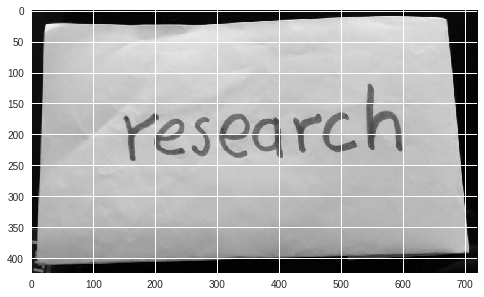

In [0]:
plt.imshow(imageP,cmap = plt.cm.gray)

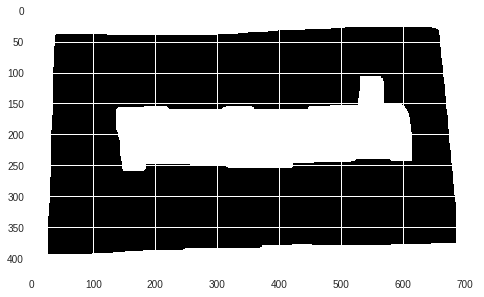

In [0]:

#Binarización
_, imgP = cv2.threshold(imageP,130, 255, cv2.THRESH_BINARY_INV)


#Dilatación para unir partes del objeto que quedan incompletas
kernel1  =  np . ones ((30,30), np . uint8 )
dilatacion = cv2.dilate(imgP,kernel1,iterations = 1)

# CIERRE--COVOLUCIÓN
#Es útil para cerrar pequeños orificios dentro de los objetos en primer plano o pequeños puntos negros en el objeto.


kernel1  =  np . ones ((50,50), np . uint8 )
cierre  =  cv2.morphologyEx(dilatacion, cv2.MORPH_CLOSE, kernel1)
plt.imshow(cierre,cmap = plt.cm.gray)

In [0]:
im2, contornos, jerarquía = cv2.findContours (cierre,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contornos=np.r_[contornos]
len(contornos)

3

In [0]:
limites= np.zeros((len(contornos),4))
areas=np.zeros((len(contornos),1))
for i in range(len(contornos)):
  #Señalar los limites del rextangulo, xInit, yInit, xEnd, fEnd
  limites[i,:]= cv2.boundingRect(contornos[i])
  puntox1= limites[i,0]
  puntox2=limites[i,2]
  puntoy1= limites[i,1]
  puntoy2= limites[i,3]
  base= (puntox2-puntox1)
  altura= (puntoy2-puntoy1)
  areas[i]=abs(base*altura)

In [0]:
zonas=list()
#print(areas, areaP)
c=0
while c< len(areas):
  if areas[c] < areaP*0.80:
    zonas.append(limites[c,:])
  c=c+1
print (zonas[0])


[137. 106. 478. 153.]


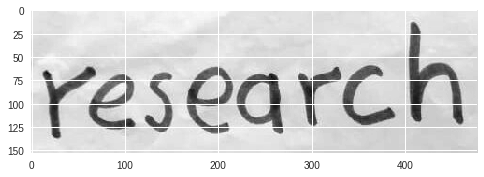

In [0]:
zona=zonas[0]
f_image=imageP[int(zona[1]):int(zona[1]+zona[3]),int(zona[0]):int(zona[0]+zona[2])]
#f_image=imageP[106:259,137:615]
plt.imshow(f_image,cmap = plt.cm.gray)

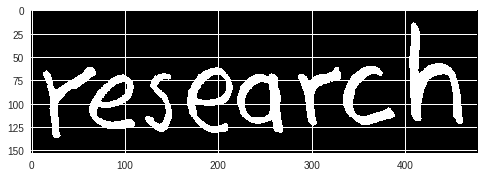

In [0]:
#Binarización
_, binary = cv2.threshold(f_image,130, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary,cmap = plt.cm.gray)

In [0]:
im2, contornos, jerarquía = cv2.findContours (binary,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contornos=np.r_[contornos]
len(contornos)

11

In [0]:
limites= np.zeros((len(contornos),4))
areas=np.zeros((len(contornos),1))
for i in range(len(contornos)):
  #Señalar los limites del rextangulo, xInit, yInit, xEnd, fEnd
  limites[i,:]= cv2.boundingRect(contornos[i])
  puntox1= limites[i,0]
  puntox2=limites[i,2]
  puntoy1= limites[i,1]
  puntoy2= limites[i,3]
  base= (puntox2-puntox1)
  altura= (puntoy2-puntoy1)
  areas[i]=abs(base*altura)
limites.shape[0]

11

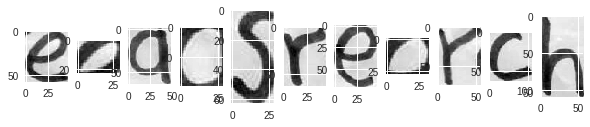

In [0]:
fig= plt.figure(figsize=(10,10))
images=[]
for i in range(len(limites)):
    ax=fig.add_subplot(1,len(limites),i+1)
    zona=limites[i]
    f_image2=f_image[int(zona[1]):int(zona[1]+zona[3]),int(zona[0]):int(zona[0]+zona[2])]
    #f_image=imageP[106:259,137:615]
    plt.imshow(f_image2,cmap = plt.cm.gray)
    images.append(f_image2)

In [0]:
c=0
arreglo=list()

while c< limites.shape[0]:
  for i in range(limites.shape[0]):
    if c != i:
      if (limites[c,2]+limites[c,0])<= (limites[i,2]+limites[i,0]) and limites[c,0]>= limites[i,0] and (limites[c,3]+limites[c,1])<= (limites[i,3]+limites[i,1]) and limites[c,1]>= limites[i,1]:
           
          arreglo.append(c)
          
      else:
        continue
    else:
         continue
      
  c=c+1


In [0]:
arreglo
a=len(arreglo)
resta=limites.shape[0] - a
print (resta)

8


In [0]:
limites_c=np.array(limites,dtype=bool)
print(limites_c)
limites_c[arreglo]=False
print(limites_c)
limites=limites[limites_c]
print(limites)
limites=limites.reshape((resta,4))
print(limites)


[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[ True  True  True  True]
 [False False False False]
 [ True  True  True  True]
 [False False False False]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [False False False False]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[ 62.  69.  49.  58. 220.  67.  50.  65. 122.  67.  29.  63. 286.  61.
  46.  63. 167.  61.  49.  71.  13.  61.  56.  76. 334.  60.  55.  63.
 404.  13.  58. 109.]
[[ 62.  69.  49.  58.]
 [220.  67.  50.  65.]
 [122.  67.  29.  63.]
 [286.  61.  46.  63.]
 [167.  61.  49.  71.]
 [ 13.  61.  56.  76.]
 [334.  60.  55.  63.]
 [404.  13.  58. 109.]]


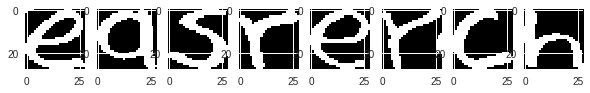

In [0]:
fig= plt.figure(figsize=(10,10))
images=[]
for i in range(len(limites)):
    ax=fig.add_subplot(1,len(limites),i+1)
    zona=limites[i]
    f_image2=f_image[int(zona[1]):int(zona[1]+zona[3]),int(zona[0]):int(zona[0]+zona[2])]
    f_image=imageP[106:259,137:615]
    imgf = cv2.resize(f_image2, (28,28), interpolation=cv2.INTER_AREA)
    _, img3 = cv2.threshold(imgf,130, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(img3,cmap = plt.cm.gray)
    images.append(img3)
    

In [0]:
x_limite=[]
imagesO=[]
for j in range(len(limites)):
  puntos= limites[j]
  x_limite.append(puntos[0])

In [0]:
lim=np.copy(x_limite)
images=np.r_[images]

In [0]:
c=0
while c <len(lim):
    minimo= np.min(x_limite)
    ind= lim==minimo  
    n=images[ind]
    #print(ind)
    imagesO.append(n)
    x_limite.remove(minimo)
    c=c+1


In [0]:
images_f=[]
for k in range(len(imagesO)):
  n=imagesO[k]
  images_f.append(n[0])
  
    


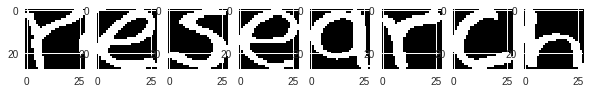

In [0]:
fig= plt.figure(figsize=(10,10))
for i in range(len(images_f)):
    ax=fig.add_subplot(1,len(images_f),i+1)
    m=images_f[i]
    plt.imshow(m,cmap = plt.cm.gray)
    images_f[i]=m.reshape(784)
    

In [0]:
pred=clasificacion(images_f)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [0]:
frase= concatena(pred)

In [0]:
frase

'rpspqrcm'

In [0]:
voz(frase, "EN","voz1.mp3")

# ***Imagenes sin ruido***

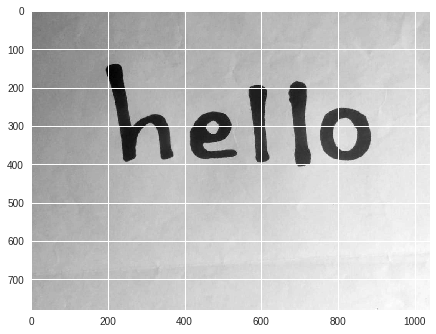

In [0]:

#for k in range(34):
    img= cv2.imread("drive/My Drive/Colab Notebooks/Imagenes2/hello.jpeg")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray,cmap = plt.cm.gray)
    

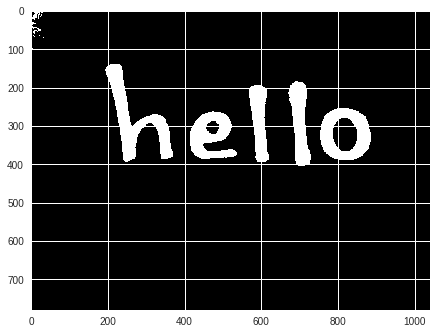

In [0]:
    #SEGMENTACIÓN CARACTERES
    
    #Binarización
    _, imgP2 = cv2.threshold(gray,100, 255, cv2.THRESH_BINARY_INV)
    #_, imgP2 = cv2.threshold(gray,130, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(imgP2,cmap = plt.cm.gray)


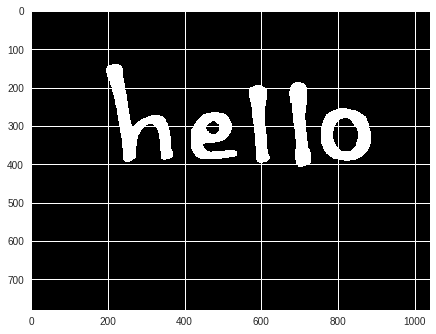

In [0]:
    #Apertura
    kernel1  =  np . ones ((10,10), np . uint8 )
    apertura = cv2.morphologyEx(imgP2, cv2.MORPH_OPEN, kernel1)
    plt.imshow(apertura,cmap = plt.cm.gray)


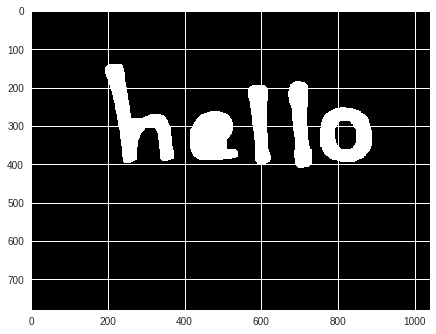

In [0]:
 #Dilatación para unir partes del objeto que quedan incompletas
    kernel1  =  np . ones ((6,6), np . uint8 )
    dilatacion = cv2.dilate(apertura,kernel1,iterations = 1)

    # CIERRE--COVOLUCIÓN
    #Es útil para cerrar pequeños orificios dentro de los objetos en primer plano o pequeños puntos negros en el objeto.
    kernel1  =  np . ones ((25,25), np . uint8 )
    cierre  =  cv2.morphologyEx(dilatacion, cv2.MORPH_CLOSE, kernel1)
    plt.imshow(cierre,cmap = plt.cm.gray)
    im2, contornos, jerarquía = cv2.findContours (dilatacion,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

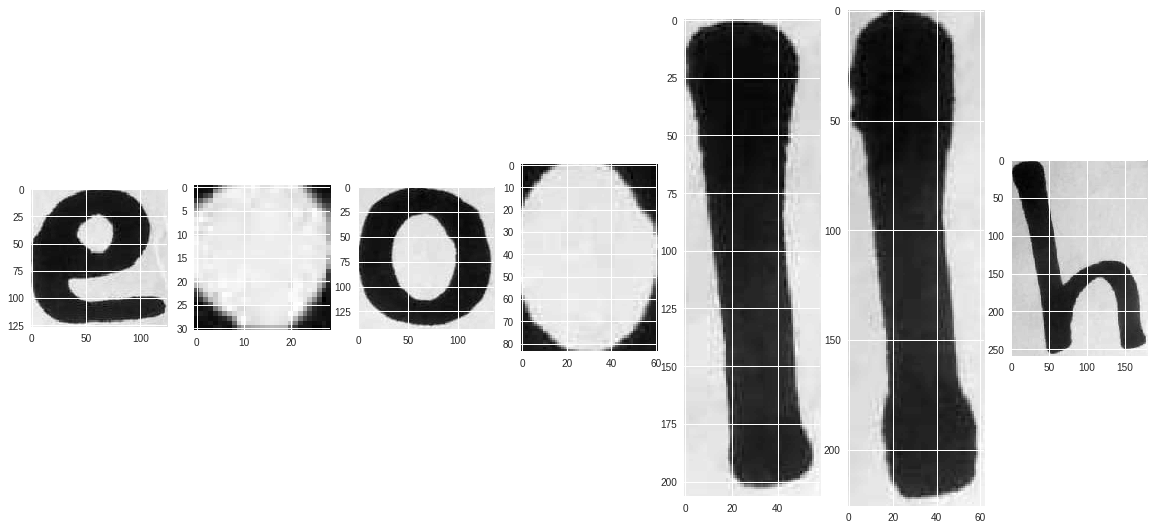

In [0]:
#Contornos
    contornos=np.r_[contornos]
    len(contornos)
    
    limites= np.zeros((len(contornos),4))
    areas=np.zeros((len(contornos),1))
    for i in range(len(contornos)):
      #Señalar los limites del rextangulo, xInit, yInit, xEnd, fEnd
      limites[i,:]= cv2.boundingRect(contornos[i])
      puntox1= limites[i,0]
      puntox2=limites[i,2]
      puntoy1= limites[i,1]
      puntoy2= limites[i,3]
      base= (puntox2-puntox1)
      altura= (puntoy2-puntoy1)
      areas[i]=abs(base*altura)
    limites.shape[0]
    
    #Graficar
    fig= plt.figure(figsize=(20,20))
    images=[]
    for i in range(len(limites)):
        ax=fig.add_subplot(1,len(limites),i+1)
        zona=limites[i]
        f_image2=gray[int(zona[1]):int(zona[1]+zona[3]),int(zona[0]):int(zona[0]+zona[2])]
        #f_image=imageP[106:259,137:615]
        plt.imshow(f_image2,cmap = plt.cm.gray)
        images.append(f_image2)
        
    #Eliminar ruido    
    c=0
    arreglo=list()
    while c< limites.shape[0]:
      for i in range(limites.shape[0]):
        if c != i:
          if (limites[c,2]+limites[c,0])<= (limites[i,2]+limites[i,0]) and limites[c,0]>= limites[i,0] and (limites[c,3]+limites[c,1])<= (limites[i,3]+limites[i,1]) and limites[c,1]>= limites[i,1]:

              arreglo.append(c)

          else:
            continue
        else:
             continue

      c=c+1

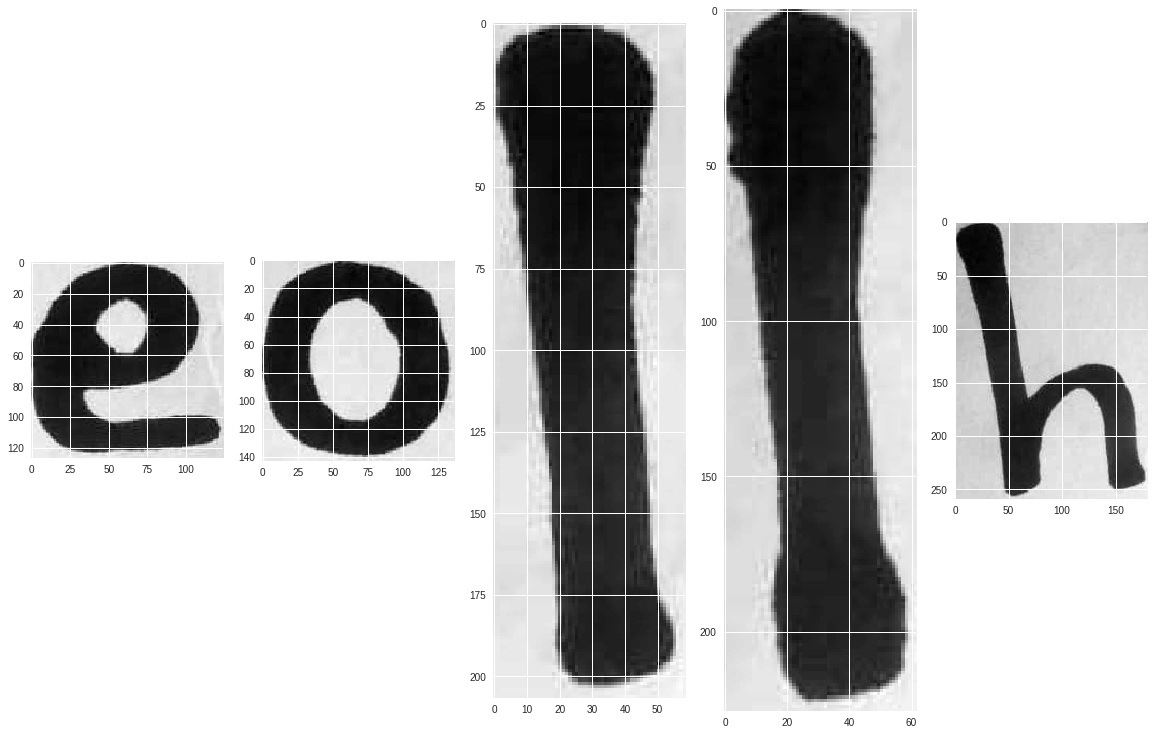

In [0]:
  #Imagenes a eliminar
    arreglo
    a=len(arreglo)
    resta=limites.shape[0] - a
    
    #Modifica el vector limites
    limites_c=np.array(limites,dtype=bool)
    limites_c[arreglo]=False
    limites=limites[limites_c]
    limites=limites.reshape((resta,4))
        

    #Graficar
    fig= plt.figure(figsize=(20,20))
    images=[]
    for i in range(len(limites)):
        ax=fig.add_subplot(1,len(limites),i+1)
        zona=limites[i]
        f_image2=gray[int(zona[1]):int(zona[1]+zona[3]),int(zona[0]):int(zona[0]+zona[2])]
        plt.imshow(f_image2,cmap = plt.cm.gray)
        images.append(f_image2)

In [0]:
#resize, binarizaciòn , dataset
fimages=[]  
x_limite=[]
imagesO=[]
images_f=[]
for j in range(len(limites)):
    puntos= limites[j]
    x_limite.append(puntos[0])
        
    lim=np.copy(x_limite)
    images=np.r_[images]
      
    c=0
while c <len(lim):
          minimo= np.min(x_limite)
          ind= lim==minimo  
          n=images[ind]
          #print(ind)
          imagesO.append(n)
          x_limite.remove(minimo)
          c=c+1
          
      
for k in range(len(imagesO)):
        n=imagesO[k]
        images_f.append(n[0])     
      

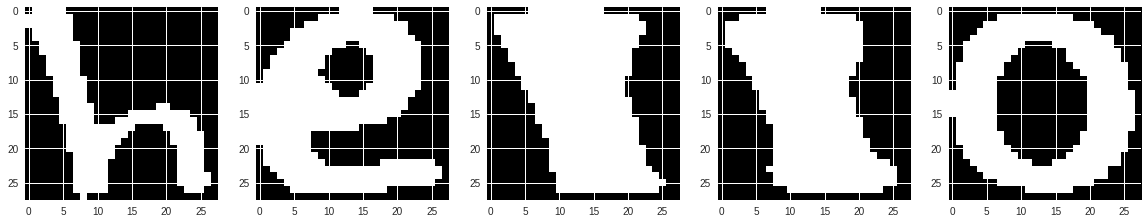

In [0]:


for i in range(len(images_f)):

      x= images_f[i]
      m = cv2.resize(x, (28,28), interpolation=cv2.INTER_AREA)  
      #Binarización
      #_, m = cv2.threshold(m,130, 255, cv2.THRESH_BINARY_INV)
      _, m = cv2.threshold(m,85, 255, cv2.THRESH_BINARY_INV)
      m=m.reshape(784)
      images_f[i]=m
            
   
    
    
  #Grafica OWN-Datasets
fig= plt.figure(figsize=(20,20))
for i in range(len(images_f)):
        ax=fig.add_subplot(1,len(images_f),i+1)
        m= images_f[i]
        m=m.reshape(28,28)
        plt.imshow(m,cmap = plt.cm.gray)

In [0]:
pred=clasificacion(images_f)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [0]:
frase= concatena(pred)

In [0]:
print(pred)

[ 8  2  2  5 17]


In [0]:
print(frase)

hbbeq


In [0]:
voz(frase, "EN","voz2.mp3")

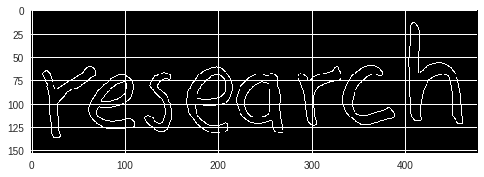

In [0]:
canny = cv2.Canny(binary,50,255)
plt.imshow(canny,cmap = plt.cm.gray)